In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
def ecdf(data):
    x = np.sort(data)
    n = len(data)
    y = np.arange(1, len(x)+1)/n
    return x,y

def plot_ecdf(df):
    ETD_orders = df.delta_est_ord_arrive_time.tolist()
    True_EDT_orders = df.delta_ord_arrive_time.tolist()
    model_ETD_orders = df.our_model_predict.tolist()
    
    x_est_ETD, y_est_ETD = ecdf(ETD_orders)
    x_ETD, y_ETD = ecdf(True_EDT_orders)
    x_model_ETD, y_model_ETD = ecdf(model_ETD_orders)
    
    _ = plt.plot(x_ETD, y_ETD)
    _ = plt.plot(x_est_ETD, y_est_ETD)
    _ = plt.plot(x_model_ETD, y_model_ETD)
    _ = plt.title('for {}'.format(df.customer_state.tolist()[-1]))
    _ = plt.legend(['True ETD', 'EST ETD', 'model ETD predict'])
    
    _ = plt.show()
    

    
def draw_ecdf_models(df):
    states = X_test.customer_state.unique().tolist()  

    for s in states:
        plot_ecdf(df[clean_data.customer_state == s])

In [3]:
sellers_data = pd.read_csv('../input/olist_sellers_dataset.csv')
product_cat = pd.read_csv('../input/product_category_name_translation.csv')
orders_dataset = pd.read_csv('../input/olist_orders_dataset.csv')
order_items_dataset = pd.read_csv('../input/olist_order_items_dataset.csv')
customers_dataset = pd.read_csv('../input/olist_customers_dataset.csv')
geolocation_dataset = pd.read_csv('../input/olist_geolocation_dataset.csv')
order_payments_dataset = pd.read_csv('../input/olist_order_payments_dataset.csv')
order_reviews_dataset = pd.read_csv('../input/olist_order_reviews_dataset.csv')
products_dataset = pd.read_csv('../input/olist_products_dataset.csv')




## Improve ETD accuracy

Build model which predict for items withing range of 7 days. In order to do that we have to
- assembly the part which is primary needed for prediction.
- drop their prediction columns since it has a large shift.
- drop Nan
- drop any delivery with status canceled 
- drop any orders for which time taken to postal office is more than 7 days


In [4]:
df_all = pd.merge(orders_dataset, customers_dataset, on='customer_id')
df_all = pd.merge(order_items_dataset, df_all, on='order_id')

In [5]:
if 'order_estimated_delivery_date' in df_all.columns:
    df_all.drop(columns=['order_estimated_delivery_date'], inplace=True)

In [6]:
df_all['order_purchase_timestamp'] = pd.to_datetime(df_all.order_purchase_timestamp)

In [7]:
clean_data = df_all.dropna()
clean_data = clean_data[clean_data.order_status == 'delivered']

In [8]:
clean_data['shipping_limit_date'] = pd.to_datetime(clean_data.shipping_limit_date)
clean_data['order_approved_at'] = pd.to_datetime(clean_data.order_approved_at)
clean_data['order_delivered_carrier_date'] = pd.to_datetime(clean_data.order_delivered_carrier_date)
clean_data['order_delivered_customer_date'] = pd.to_datetime(clean_data.order_delivered_customer_date)

## the accuracy of the model has to be tested for following cases
1. it has long approvment delay
2. it has not long delay

## Measure
1. clean_data.order_delivered_carrier_date - clean_data.order_approved_at
2. clean_data.order_delivered_carrier_date - clean_data.order_purchase_timestamp


In [17]:
week_perious = clean_data.order_delivered_carrier_date - clean_data.order_approved_at < pd.to_timedelta("8 day")
clean_data['since_approved_carried'] = (clean_data.order_delivered_carrier_date - clean_data.order_approved_at).dt.days
clean_data['since_bought_carried'] = (clean_data.order_delivered_carrier_date - clean_data.order_purchase_timestamp).dt.days

clean_data['since_approved_customer'] = (clean_data.order_delivered_customer_date - clean_data.order_approved_at).dt.days
clean_data['since_bought_customer'] = (clean_data.order_delivered_customer_date - clean_data.order_purchase_timestamp).dt.days


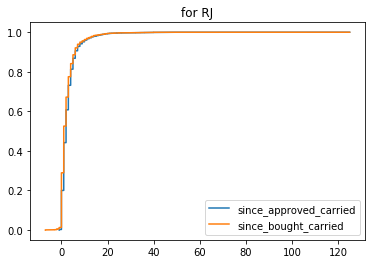

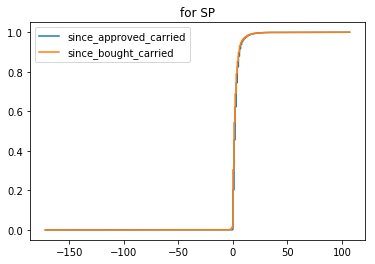

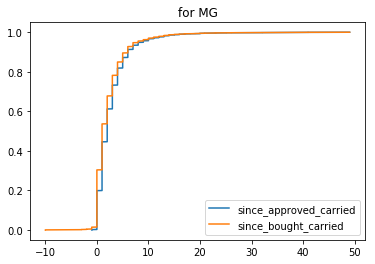

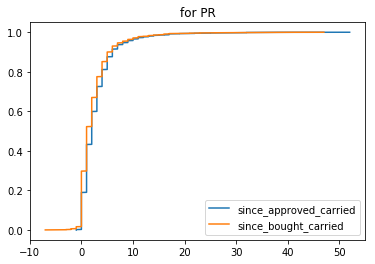

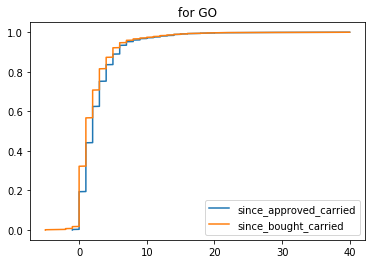

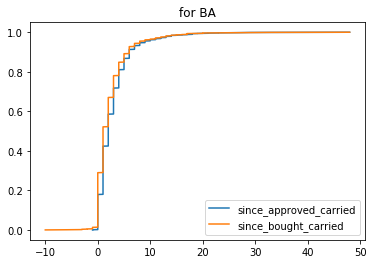

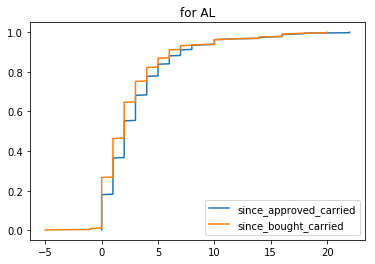

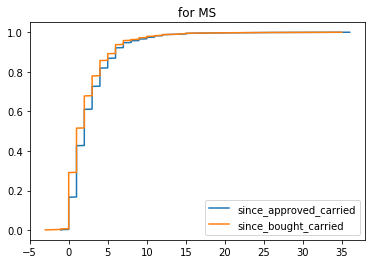

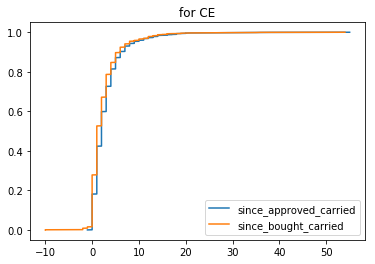

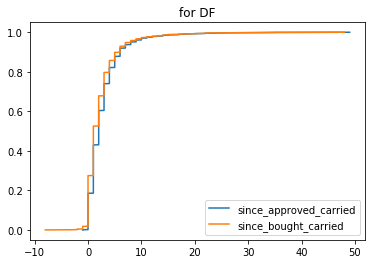

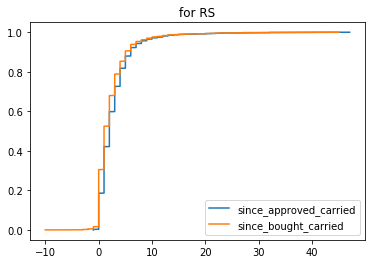

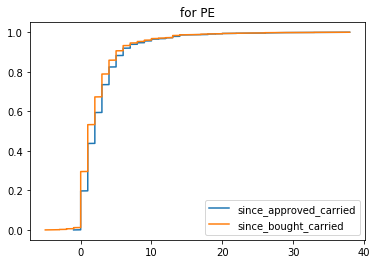

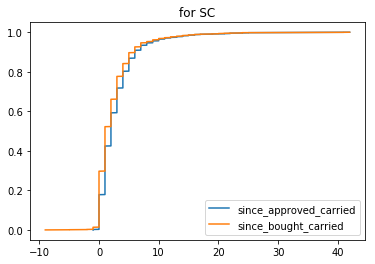

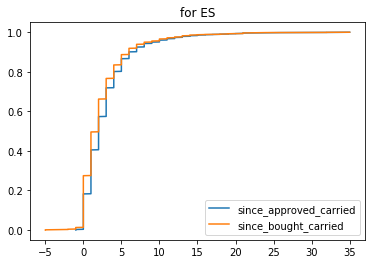

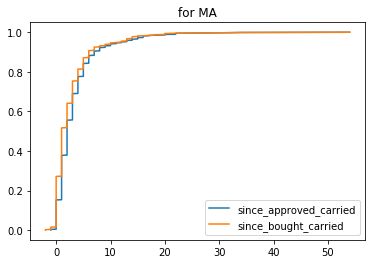

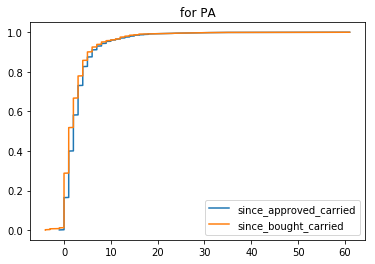

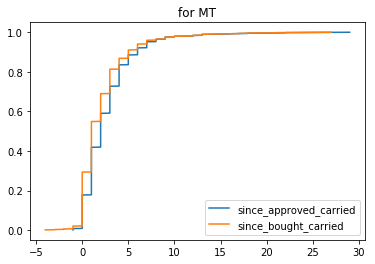

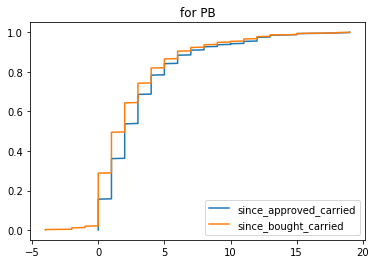

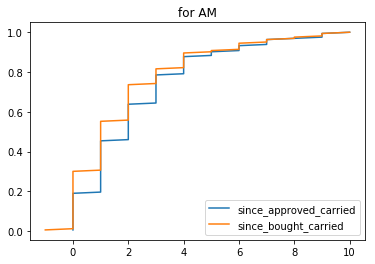

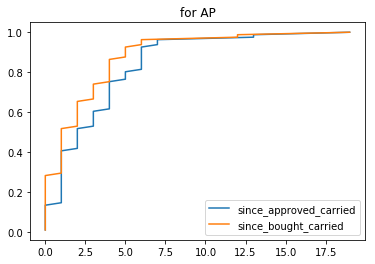

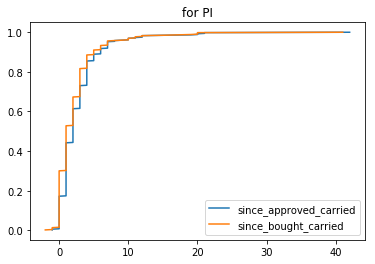

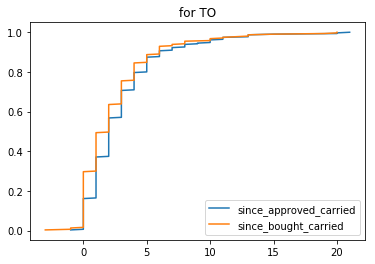

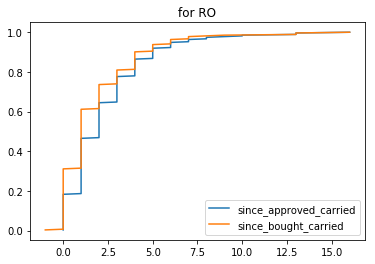

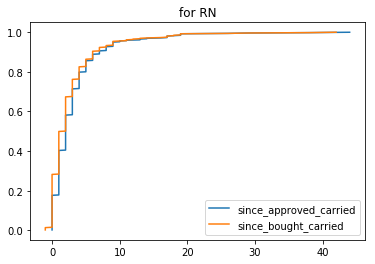

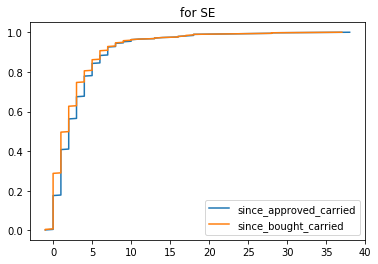

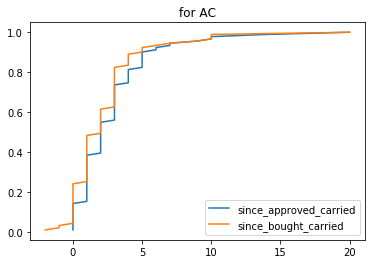

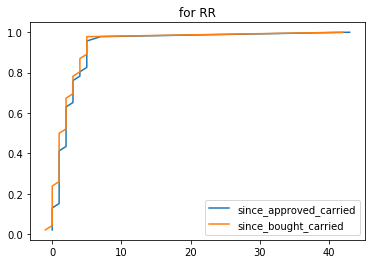

In [23]:
states = clean_data.customer_state.unique().tolist()
figures = []

def plot_ecdf(df):
    since_approved_carried = df.since_approved_carried.tolist()
    since_bought_carried = df.since_bought_carried.tolist()
    since_approved_customer = df.since_approved_customer.tolist()
    since_bought_customer = df.since_bought_customer.tolist()
    
    x_est_ETD, y_est_ETD = ecdf(since_approved_carried)
    x_ETD, y_ETD = ecdf(since_bought_carried)
#     x_appc, y_appc = ecdf(since_approved_customer)
#     x_bh, y_bh = ecdf(since_bought_customer)
    
    _ = plt.plot(x_ETD, y_ETD)
    _ = plt.plot(x_est_ETD, y_est_ETD)
#     _ = plt.plot(x_appc, y_appc)
#     _ = plt.plot(x_bh, y_bh)
    _ = plt.title('for {}'.format(df.customer_state.tolist()[-1]))
    _ = plt.legend(['since_approved_carried', 'since_bought_carried'])
    
    _ = plt.show()
    
    

for s in states:
    plot_ecdf(clean_data[clean_data.customer_state == s])






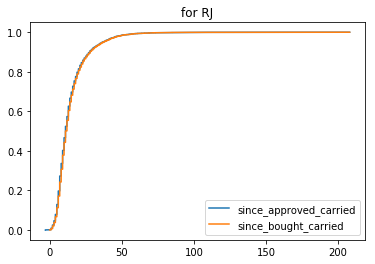

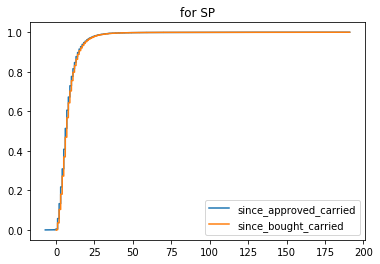

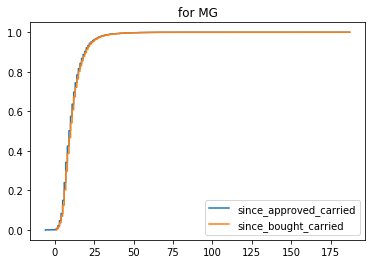

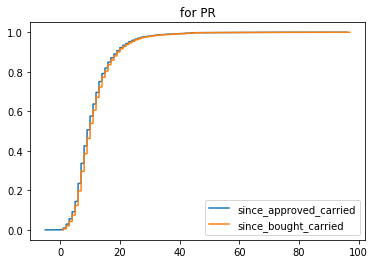

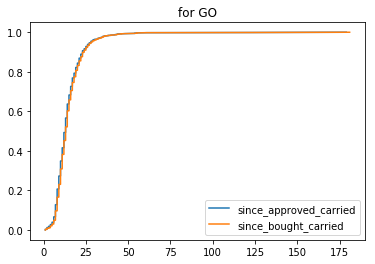

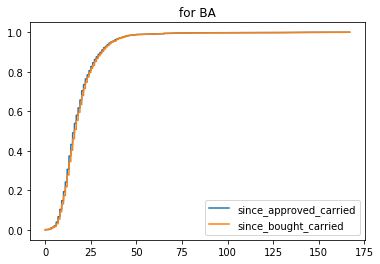

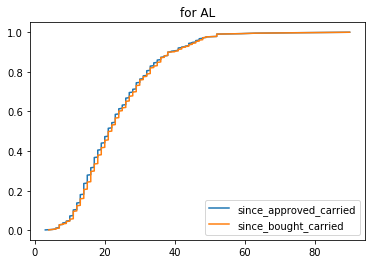

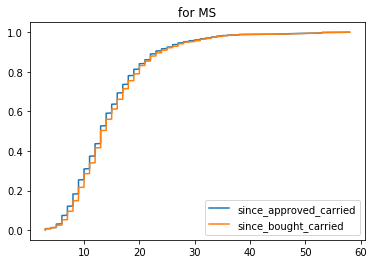

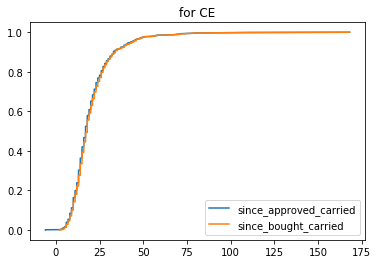

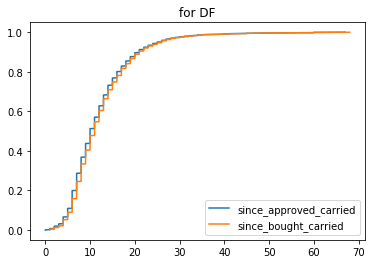

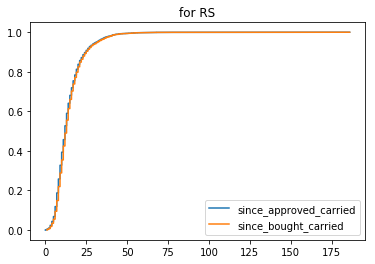

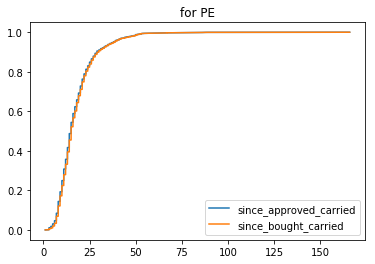

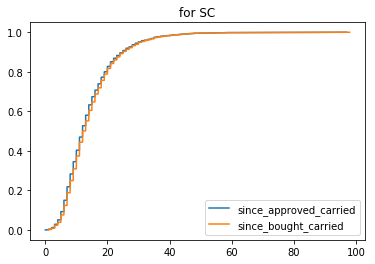

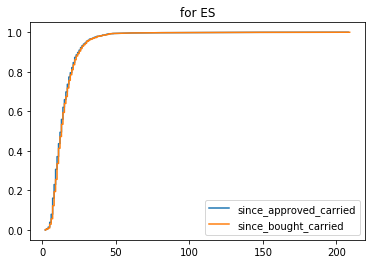

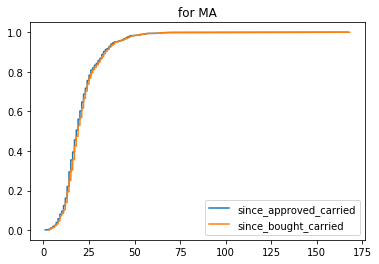

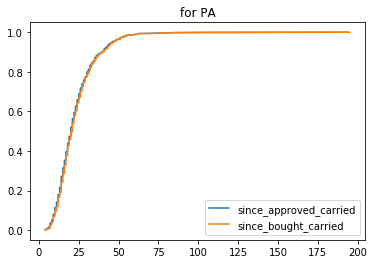

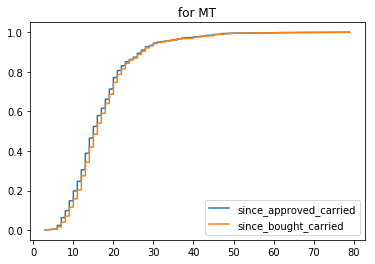

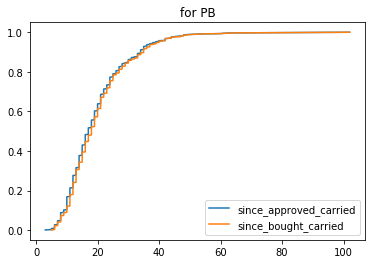

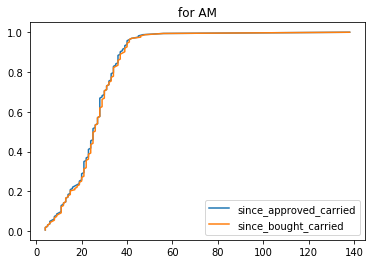

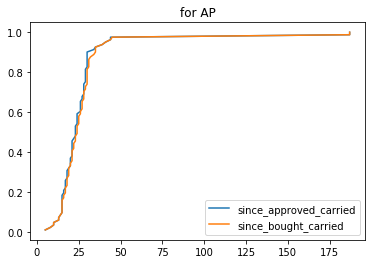

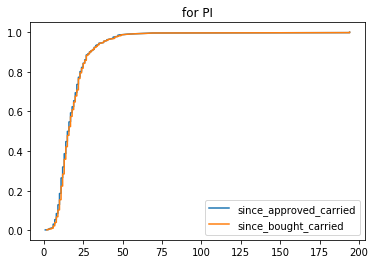

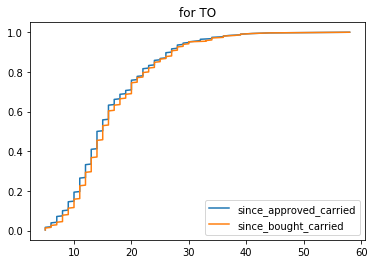

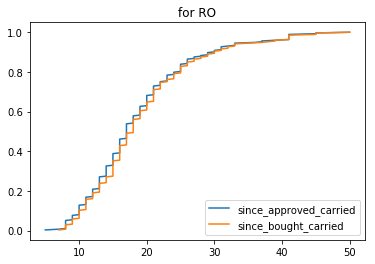

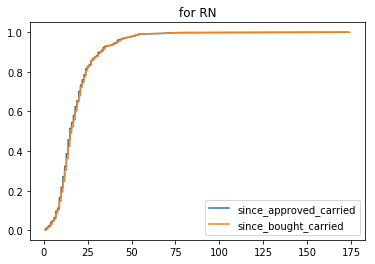

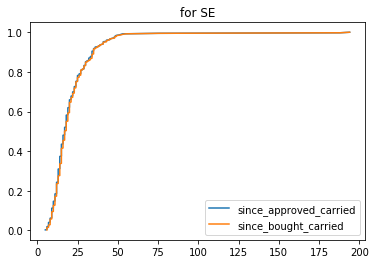

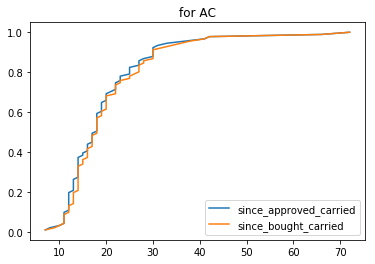

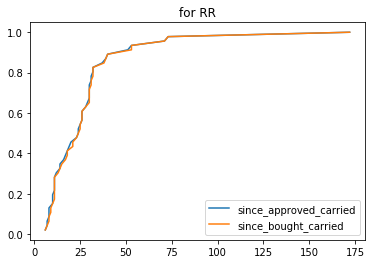

In [21]:
states = clean_data.customer_state.unique().tolist()
figures = []

def plot_ecdf(df):
    since_approved_carried = df.since_approved_carried.tolist()
    since_bought_carried = df.since_bought_carried.tolist()
    since_approved_customer = df.since_approved_customer.tolist()
    since_bought_customer = df.since_bought_customer.tolist()
    
#     x_est_ETD, y_est_ETD = ecdf(since_approved_carried)
#     x_ETD, y_ETD = ecdf(since_bought_carried)
    x_appc, y_appc = ecdf(since_approved_customer)
    x_bh, y_bh = ecdf(since_bought_customer)
    
#     _ = plt.plot(x_ETD, y_ETD)
#     _ = plt.plot(x_est_ETD, y_est_ETD)
    _ = plt.plot(x_appc, y_appc)
    _ = plt.plot(x_bh, y_bh)
    _ = plt.title('for {}'.format(df.customer_state.tolist()[-1]))
    _ = plt.legend(['since_approved_customer', 'since_bought_customer'])
    
    _ = plt.show()
    
    

for s in states:
    plot_ecdf(clean_data[clean_data.customer_state == s])





##  Pick better fulfillment plans, better meaning "faster" or "cheaper"


In [21]:
# code goes below
# find the min of time which takes to an item to arrive

## Improve conversion and maximize revenue by dynamically pricing premium delivery options for loyal customers

In [22]:
# code goes below

In [23]:
# reference https://www.kaggle.com/lukio43/a-simple-analysis-of-delayed-orders
# https://blog.postmates.com/estimating-delivery-times-a-case-study-in-practical-machine-learning-e70f677e736c
# try to predict the optimal waiting time before an item has been shifted

# ideas

In [61]:
# clean_data['it_took'] = clean_data.order_approved_at - clean_data.order_purchase_timestamp 
# it can be used to spot if most of canceled item are between 

In [66]:
mask = clean_data.order_delivered_carrier_date -  clean_data.order_approved_at < pd.to_timedelta("8 day")

In [67]:
clean_data[mask]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,it_took
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,0 days 00:46:33
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,0 days 00:14:59
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,0 days 00:09:43
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34,2017-05-17 03:55:27,2017-05-17 11:05:55,2017-05-22 13:44:35,85c835d128beae5b4ce8602c491bf385,38017,uberaba,MG,1 days 06:12:53
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85,32e2e6ab09e778d99bf2e0ecd4898718,delivered,2017-12-10 11:53:48,2017-12-10 12:10:31,2017-12-12 01:07:48,2017-12-18 22:03:38,635d9ac1680f03288e72ada3a1035803,16700,guararapes,SP,0 days 00:16:43
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75,9ed5e522dd9dd85b4af4a077526d8117,delivered,2018-07-04 12:08:27,2018-07-05 16:35:48,2018-07-05 12:15:00,2018-07-09 14:04:07,fda4476abb6307ab3c415b7e6d026526,11702,praia grande,SP,1 days 04:27:21
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65,16150771dfd4776261284213b89c304e,delivered,2018-03-19 18:40:33,2018-03-20 18:35:21,2018-03-28 00:37:42,2018-03-29 18:17:31,639d23421f5517f69d0c3d6e6564cf0e,11075,santos,SP,0 days 23:54:48
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40,351d3cb2cee3c7fd0af6616c82df21d3,delivered,2018-07-02 13:59:39,2018-07-02 14:10:56,2018-07-03 14:25:00,2018-07-04 17:28:31,0782c41380992a5a533489063df0eef6,6636,jandira,SP,0 days 00:11:17
10,00061f2a7bc09da83e415a52dc8a4af1,1,d63c1011f49d98b976c352955b1c4bea,cc419e0650a3c5ba77189a1882b7556a,2018-03-29 22:28:09,59.99,8.88,c6fc061d86fab1e2b2eac259bac71a49,delivered,2018-03-24 22:16:10,2018-03-24 22:28:09,2018-03-27 05:26:55,2018-03-29 00:04:19,107e6259485efac66428a56f10801f4f,13419,piracicaba,SP,0 days 00:11:59
11,00063b381e2406b52ad429470734ebd5,1,f177554ea93259a5b282f24e33f65ab6,8602a61d680a10a82cceeeda0d99ea3d,2018-07-31 17:30:39,45.00,12.98,6a899e55865de6549a58d2c6845e5604,delivered,2018-07-27 17:21:27,2018-07-27 18:00:06,2018-07-30 14:52:00,2018-08-07 13:56:52,3fb97204945ca0c01bcf3eee6031c5f1,15910,monte alto,SP,0 days 00:38:39
